##### Copyright 2018 The TensorFlow Authors.

In [14]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [15]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.

# Basic classification: Classify images of clothing

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This guide trains a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details; this is a fast-paced overview of a complete TensorFlow program with the details explained as you go.

This guide uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

In [5]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.17.0


## Import the Fashion MNIST dataset

This guide uses the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and [load the Fashion MNIST data](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data) directly from TensorFlow:

In [6]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [15]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [27]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [29]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [13]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [33]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [35]:
len(test_labels)

10000

## Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

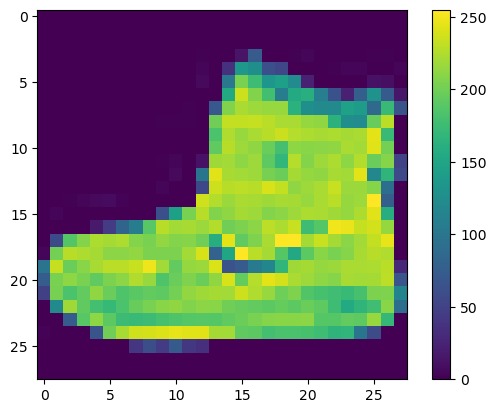

In [37]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [17]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

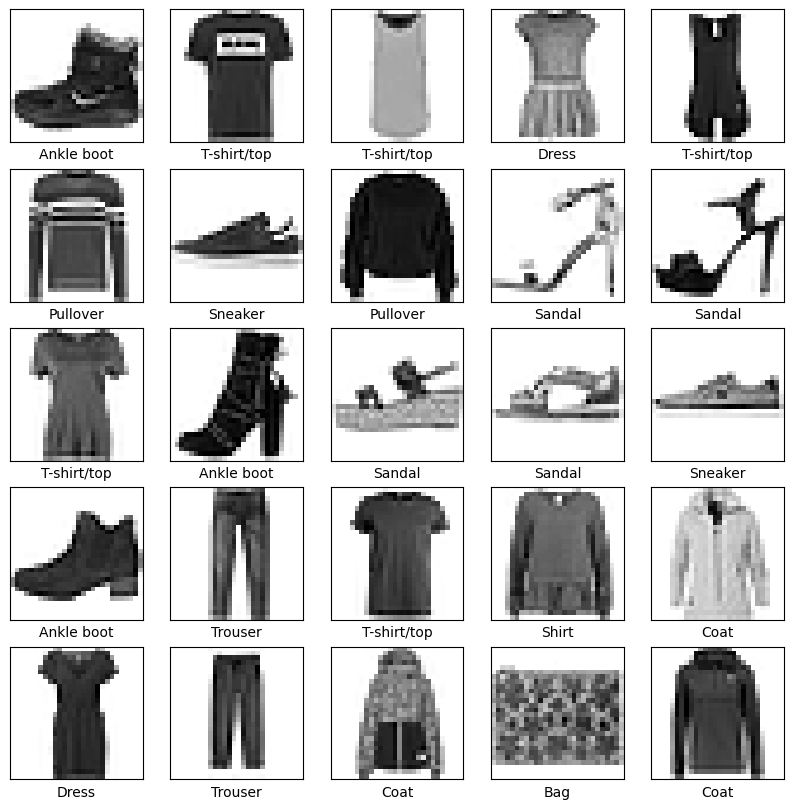

In [311]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

The basic building block of a neural network is the [*layer*](https://www.tensorflow.org/api_docs/python/tf/keras/layers). Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

D:\Languages\Python\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's [*compile*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) step:

* [*Optimizer*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) —This is how the model is updated based on the data it sees and its loss function.
* [*Loss function*](https://www.tensorflow.org/api_docs/python/tf/keras/losses) —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* [*Metrics*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the training data is in the `train_images` and `train_labels` arrays.
2. The model learns to associate images and labels.
3. You ask the model to make predictions about a test set—in this example, the `test_images` array.
4. Verify that the predictions match the labels from the `test_labels` array.


### Feed the model

To start training,  call the [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method—so called because it "fits" the model to the training data:

In [27]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7836 - loss: 0.6270
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8614 - loss: 0.3842
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8774 - loss: 0.3398
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8884 - loss: 0.3072
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8926 - loss: 0.2924
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8979 - loss: 0.2765
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9009 - loss: 0.2637
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9062 - loss: 0.2545
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9088 - loss: 0.2493
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9150 - loss: 0.2313


 675/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7339 - loss: 0.7735

 719/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7375 - loss: 0.7627

 761/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7406 - loss: 0.7531

 804/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7436 - loss: 0.7441

 846/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7463 - loss: 0.7358

 887/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7488 - loss: 0.7282

 931/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7513 - loss: 0.7205

 973/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7535 - loss: 0.7136

1015/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7556 - loss: 0.7071

1058/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7577 - loss: 0.7008

1102/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7597 - loss: 0.6947

1146/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7616 - loss: 0.6890

1187/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7633 - loss: 0.6838

1228/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7649 - loss: 0.6789

1269/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7664 - loss: 0.6741

1311/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7679 - loss: 0.6694

1352/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7694 - loss: 0.6650

1393/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7708 - loss: 0.6608

1435/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7721 - loss: 0.6566

1477/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7735 - loss: 0.6526

1515/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7746 - loss: 0.6491

1553/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7757 - loss: 0.6457

1594/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7769 - loss: 0.6422

1637/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7780 - loss: 0.6386

1679/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7791 - loss: 0.6353

1720/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7802 - loss: 0.6321

1763/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7812 - loss: 0.6289

1805/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7822 - loss: 0.6259

1848/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7832 - loss: 0.6228

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.7839 - loss: 0.6209


Epoch 2/10


   1/1875 ━━━━━━━━━━━━━━━━━━━━ 1:31 49ms/step - accuracy: 0.8125 - loss: 0.4093

  43/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8648 - loss: 0.3935   

  87/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8632 - loss: 0.3956

 131/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8612 - loss: 0.3974

 175/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8600 - loss: 0.3983

 219/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8592 - loss: 0.3982

 262/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8590 - loss: 0.3972

 305/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8590 - loss: 0.3961

 349/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8592 - loss: 0.3947

 393/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8594 - loss: 0.3930

 437/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8597 - loss: 0.3916

 480/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8599 - loss: 0.3908

 525/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8600 - loss: 0.3900

 568/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8602 - loss: 0.3892

 612/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8605 - loss: 0.3884

 656/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8607 - loss: 0.3877

 700/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8609 - loss: 0.3871

 743/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8610 - loss: 0.3866

 786/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8612 - loss: 0.3861

 831/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8614 - loss: 0.3855

 875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8615 - loss: 0.3850

 919/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8617 - loss: 0.3845

 962/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8618 - loss: 0.3840

1006/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8620 - loss: 0.3835

1049/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8621 - loss: 0.3830

1093/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8623 - loss: 0.3825

1136/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8624 - loss: 0.3820

1180/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8626 - loss: 0.3816

1224/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8627 - loss: 0.3812

1269/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8628 - loss: 0.3808

1313/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8629 - loss: 0.3804

1355/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8630 - loss: 0.3800

1399/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8631 - loss: 0.3797

1443/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8632 - loss: 0.3794

1486/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8633 - loss: 0.3791

1530/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8634 - loss: 0.3788

1574/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8635 - loss: 0.3785

1618/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8636 - loss: 0.3782

1661/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8636 - loss: 0.3780

1705/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8637 - loss: 0.3777

1749/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8638 - loss: 0.3775

1792/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8638 - loss: 0.3773

1836/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8639 - loss: 0.3771

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8640 - loss: 0.3769


Epoch 3/10


   1/1875 ━━━━━━━━━━━━━━━━━━━━ 1:30 48ms/step - accuracy: 0.8750 - loss: 0.4727

  41/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8814 - loss: 0.3375   

  82/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8801 - loss: 0.3362

 123/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8804 - loss: 0.3342

 166/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8808 - loss: 0.3320

 208/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8815 - loss: 0.3297

 251/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8818 - loss: 0.3289

 294/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8819 - loss: 0.3283

 336/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8819 - loss: 0.3281

 379/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8821 - loss: 0.3275

 422/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8821 - loss: 0.3271

 465/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8821 - loss: 0.3270

 507/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8820 - loss: 0.3269

 549/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8820 - loss: 0.3267

 592/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8819 - loss: 0.3267

 635/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8819 - loss: 0.3265

 678/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8818 - loss: 0.3265

 721/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8818 - loss: 0.3265

 765/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8817 - loss: 0.3264

 809/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8817 - loss: 0.3264

 853/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8816 - loss: 0.3265

 896/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8815 - loss: 0.3264

 938/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8815 - loss: 0.3265

 981/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8814 - loss: 0.3265

1024/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8813 - loss: 0.3265

1067/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8812 - loss: 0.3266

1109/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8811 - loss: 0.3268

1151/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8810 - loss: 0.3269

1193/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8809 - loss: 0.3270

1236/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8809 - loss: 0.3271

1279/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8808 - loss: 0.3272

1323/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8808 - loss: 0.3273

1366/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8807 - loss: 0.3274

1409/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8807 - loss: 0.3275

1452/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8806 - loss: 0.3276

1493/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8806 - loss: 0.3277

1534/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8805 - loss: 0.3278

1577/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8805 - loss: 0.3279

1620/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8805 - loss: 0.3280

1663/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8804 - loss: 0.3281

1706/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8804 - loss: 0.3282

1749/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8803 - loss: 0.3283

1793/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8803 - loss: 0.3284

1836/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8802 - loss: 0.3285

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8802 - loss: 0.3286


Epoch 4/10


   1/1875 ━━━━━━━━━━━━━━━━━━━━ 1:30 48ms/step - accuracy: 0.8750 - loss: 0.2649

  43/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8855 - loss: 0.3033   

  87/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8875 - loss: 0.2967

 130/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8879 - loss: 0.2980

 173/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8893 - loss: 0.2973

 216/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8898 - loss: 0.2976

 259/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8898 - loss: 0.2980

 302/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8898 - loss: 0.2986

 344/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8897 - loss: 0.2990

 386/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8896 - loss: 0.2994

 429/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8893 - loss: 0.2999

 471/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8890 - loss: 0.3003

 513/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8887 - loss: 0.3009

 556/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8885 - loss: 0.3015

 599/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8883 - loss: 0.3022

 642/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8881 - loss: 0.3028

 686/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8880 - loss: 0.3032

 730/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8878 - loss: 0.3037

 773/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8877 - loss: 0.3042

 817/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8876 - loss: 0.3046

 860/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8875 - loss: 0.3051

 903/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8874 - loss: 0.3054

 946/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8873 - loss: 0.3057

 990/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8872 - loss: 0.3060

1034/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8872 - loss: 0.3063

1078/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8871 - loss: 0.3066

1121/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8870 - loss: 0.3069

1163/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8869 - loss: 0.3071

1206/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8869 - loss: 0.3073

1250/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8868 - loss: 0.3075

1294/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8867 - loss: 0.3077

1337/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8867 - loss: 0.3078

1379/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8866 - loss: 0.3080

1422/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8866 - loss: 0.3081

1465/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8866 - loss: 0.3082

1508/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8865 - loss: 0.3084

1551/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8865 - loss: 0.3085

1594/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8865 - loss: 0.3086

1636/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8864 - loss: 0.3087

1680/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8864 - loss: 0.3087

1723/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8864 - loss: 0.3088

1766/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8864 - loss: 0.3089

1809/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8864 - loss: 0.3090

1854/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8864 - loss: 0.3090

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8863 - loss: 0.3090


Epoch 5/10


   1/1875 ━━━━━━━━━━━━━━━━━━━━ 1:29 48ms/step - accuracy: 0.9062 - loss: 0.2579

  44/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9037 - loss: 0.2818   

  88/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8992 - loss: 0.2875

 132/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8979 - loss: 0.2884

 175/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8978 - loss: 0.2870

 217/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8976 - loss: 0.2860

 261/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8972 - loss: 0.2857

 304/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8970 - loss: 0.2851

 348/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8968 - loss: 0.2849

 392/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8967 - loss: 0.2849

 435/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8965 - loss: 0.2851

 479/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8963 - loss: 0.2854

 523/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8961 - loss: 0.2858

 567/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8958 - loss: 0.2863

 611/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8956 - loss: 0.2868

 655/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8954 - loss: 0.2872

 699/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8951 - loss: 0.2876

 742/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8950 - loss: 0.2879

 786/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8948 - loss: 0.2883

 831/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8946 - loss: 0.2887

 875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8944 - loss: 0.2891

 919/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8942 - loss: 0.2894

 963/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8941 - loss: 0.2897

1007/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8940 - loss: 0.2900

1051/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8939 - loss: 0.2902

1095/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8938 - loss: 0.2904

1139/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8937 - loss: 0.2906

1182/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8936 - loss: 0.2907

1225/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8936 - loss: 0.2908

1268/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8935 - loss: 0.2910

1311/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8934 - loss: 0.2911

1355/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8934 - loss: 0.2912

1399/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8933 - loss: 0.2913

1444/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8932 - loss: 0.2914

1487/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8932 - loss: 0.2915

1531/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8931 - loss: 0.2916

1575/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8931 - loss: 0.2917

1620/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8930 - loss: 0.2918

1664/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8930 - loss: 0.2918

1707/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8929 - loss: 0.2919

1750/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8929 - loss: 0.2919

1792/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8929 - loss: 0.2920

1836/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8929 - loss: 0.2920

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8928 - loss: 0.2920


Epoch 6/10


   1/1875 ━━━━━━━━━━━━━━━━━━━━ 1:29 48ms/step - accuracy: 0.9688 - loss: 0.1496

  44/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9193 - loss: 0.2419   

  88/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9128 - loss: 0.2521

 134/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9106 - loss: 0.2563

 179/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9096 - loss: 0.2582

 223/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9092 - loss: 0.2589

 267/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9081 - loss: 0.2606

 311/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9072 - loss: 0.2619

 355/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9065 - loss: 0.2630

 399/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9059 - loss: 0.2641

 443/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9054 - loss: 0.2650

 488/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9049 - loss: 0.2657

 531/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9045 - loss: 0.2664

 574/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9041 - loss: 0.2672

 618/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9036 - loss: 0.2680

 662/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9032 - loss: 0.2688

 707/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9029 - loss: 0.2694

 751/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9026 - loss: 0.2699

 795/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9023 - loss: 0.2704

 838/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9020 - loss: 0.2707

 882/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9018 - loss: 0.2710

 926/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9016 - loss: 0.2714

 969/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9014 - loss: 0.2717

1011/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9012 - loss: 0.2720

1052/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9010 - loss: 0.2723

1094/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9008 - loss: 0.2726

1136/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9007 - loss: 0.2728

1180/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9006 - loss: 0.2730

1224/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9004 - loss: 0.2732

1268/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9003 - loss: 0.2735

1312/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9001 - loss: 0.2737

1354/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9000 - loss: 0.2739

1395/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8999 - loss: 0.2741

1439/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8998 - loss: 0.2743

1482/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8997 - loss: 0.2744

1525/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8996 - loss: 0.2745

1568/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8995 - loss: 0.2747

1610/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8994 - loss: 0.2748

1654/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8993 - loss: 0.2749

1698/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8993 - loss: 0.2750

1741/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8992 - loss: 0.2751

1784/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8991 - loss: 0.2752

1826/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8991 - loss: 0.2753

1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8990 - loss: 0.2754

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8990 - loss: 0.2754


Epoch 7/10


   1/1875 ━━━━━━━━━━━━━━━━━━━━ 1:30 48ms/step - accuracy: 0.9375 - loss: 0.1616

  41/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9198 - loss: 0.2280   

  83/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9133 - loss: 0.2394

 125/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9109 - loss: 0.2437

 168/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9093 - loss: 0.2476

 212/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9082 - loss: 0.2500

 255/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9075 - loss: 0.2519

 297/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9071 - loss: 0.2533

 340/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9067 - loss: 0.2543

 384/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9063 - loss: 0.2552

 427/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9060 - loss: 0.2561

 470/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9057 - loss: 0.2568

 514/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9054 - loss: 0.2574

 557/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9051 - loss: 0.2579

 600/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9048 - loss: 0.2584

 643/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9046 - loss: 0.2590

 685/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9043 - loss: 0.2595

 728/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9040 - loss: 0.2601

 774/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9037 - loss: 0.2605

 820/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9035 - loss: 0.2609

 866/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9034 - loss: 0.2612

 910/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9033 - loss: 0.2615

 955/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9031 - loss: 0.2618

1000/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9030 - loss: 0.2620

1044/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9029 - loss: 0.2622

1089/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9028 - loss: 0.2623

1132/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9027 - loss: 0.2625

1176/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9027 - loss: 0.2626

1221/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9026 - loss: 0.2627

1266/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9025 - loss: 0.2628

1309/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9024 - loss: 0.2630

1353/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9024 - loss: 0.2631

1395/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9023 - loss: 0.2632

1437/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9023 - loss: 0.2632

1480/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9023 - loss: 0.2633

1523/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9023 - loss: 0.2634

1565/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9022 - loss: 0.2634

1608/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9022 - loss: 0.2635

1651/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9022 - loss: 0.2635

1696/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9022 - loss: 0.2635

1739/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9022 - loss: 0.2636

1781/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9022 - loss: 0.2636

1823/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9022 - loss: 0.2636

1867/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9022 - loss: 0.2637

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9022 - loss: 0.2637


Epoch 8/10


   1/1875 ━━━━━━━━━━━━━━━━━━━━ 1:29 48ms/step - accuracy: 0.9375 - loss: 0.1806

  45/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8960 - loss: 0.2620   

  85/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8974 - loss: 0.2592

 128/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8979 - loss: 0.2605

 171/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8988 - loss: 0.2604

 214/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8992 - loss: 0.2607

 259/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8995 - loss: 0.2613

 303/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8997 - loss: 0.2615

 348/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9000 - loss: 0.2614

 391/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9002 - loss: 0.2614

 434/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9002 - loss: 0.2617

 478/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9002 - loss: 0.2618

 523/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9004 - loss: 0.2617

 566/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9005 - loss: 0.2617

 608/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9006 - loss: 0.2616

 648/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9008 - loss: 0.2614

 688/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9010 - loss: 0.2612

 731/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9012 - loss: 0.2609

 775/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9014 - loss: 0.2607

 819/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9016 - loss: 0.2604

 862/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9018 - loss: 0.2601

 907/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9019 - loss: 0.2598

 949/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9021 - loss: 0.2596

 992/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9022 - loss: 0.2594

1036/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9024 - loss: 0.2591

1081/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9025 - loss: 0.2589

1125/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9026 - loss: 0.2587

1170/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9027 - loss: 0.2585

1214/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9028 - loss: 0.2583

1257/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9029 - loss: 0.2582

1301/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9030 - loss: 0.2580

1345/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9031 - loss: 0.2579

1390/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9032 - loss: 0.2578

1433/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9033 - loss: 0.2577

1477/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9033 - loss: 0.2576

1521/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9034 - loss: 0.2575

1566/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9034 - loss: 0.2575

1611/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9034 - loss: 0.2575

1656/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9035 - loss: 0.2574

1699/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9035 - loss: 0.2573

1743/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9036 - loss: 0.2573

1787/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9036 - loss: 0.2572

1831/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9036 - loss: 0.2572

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9037 - loss: 0.2572


Epoch 9/10


   1/1875 ━━━━━━━━━━━━━━━━━━━━ 1:28 47ms/step - accuracy: 0.8750 - loss: 0.2169

  44/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8975 - loss: 0.2599   

  88/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9010 - loss: 0.2590

 131/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9037 - loss: 0.2565

 175/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9049 - loss: 0.2550

 219/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9057 - loss: 0.2535

 264/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9060 - loss: 0.2528

 309/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9063 - loss: 0.2518

 353/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9065 - loss: 0.2510

 396/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9066 - loss: 0.2505

 439/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9067 - loss: 0.2499

 481/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9069 - loss: 0.2493

 524/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9071 - loss: 0.2486

 567/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9072 - loss: 0.2483

 612/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9072 - loss: 0.2481

 657/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9072 - loss: 0.2479

 702/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9073 - loss: 0.2477

 747/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9073 - loss: 0.2475

 792/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9073 - loss: 0.2474

 837/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9073 - loss: 0.2473

 882/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9073 - loss: 0.2471

 926/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9074 - loss: 0.2470

 970/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9074 - loss: 0.2469

1015/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9074 - loss: 0.2469

1058/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9074 - loss: 0.2468

1100/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9074 - loss: 0.2467

1143/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9074 - loss: 0.2467

1186/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9074 - loss: 0.2467

1230/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9074 - loss: 0.2467

1273/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9074 - loss: 0.2467

1318/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9074 - loss: 0.2467

1361/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9074 - loss: 0.2467

1404/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9074 - loss: 0.2468

1448/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9075 - loss: 0.2468

1493/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9075 - loss: 0.2468

1537/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9075 - loss: 0.2468

1582/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9075 - loss: 0.2468

1625/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9075 - loss: 0.2469

1670/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9075 - loss: 0.2469

1715/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9075 - loss: 0.2469

1759/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9075 - loss: 0.2469

1804/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9075 - loss: 0.2470

1850/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9075 - loss: 0.2470

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9075 - loss: 0.2470


Epoch 10/10


   1/1875 ━━━━━━━━━━━━━━━━━━━━ 1:29 48ms/step - accuracy: 0.9062 - loss: 0.2899

  41/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8951 - loss: 0.2904   

  85/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9031 - loss: 0.2646

 129/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9069 - loss: 0.2521

 170/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9077 - loss: 0.2484

 210/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9085 - loss: 0.2467

 252/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9094 - loss: 0.2449

 294/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9101 - loss: 0.2434

 336/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9106 - loss: 0.2421

 380/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9110 - loss: 0.2412

 423/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9113 - loss: 0.2404

 466/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9114 - loss: 0.2399

 509/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9116 - loss: 0.2393

 553/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9117 - loss: 0.2389

 596/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9118 - loss: 0.2386

 637/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9118 - loss: 0.2385

 680/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9117 - loss: 0.2385

 723/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9116 - loss: 0.2386

 766/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9116 - loss: 0.2386

 809/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9115 - loss: 0.2386

 852/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9115 - loss: 0.2386

 895/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9115 - loss: 0.2386

 939/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9115 - loss: 0.2386

 982/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9115 - loss: 0.2386

1024/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9115 - loss: 0.2385

1067/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9115 - loss: 0.2385

1110/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9115 - loss: 0.2385

1153/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9115 - loss: 0.2385

1196/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9115 - loss: 0.2385

1240/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9115 - loss: 0.2385

1283/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9115 - loss: 0.2385

1326/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9114 - loss: 0.2386

1371/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9114 - loss: 0.2386

1415/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9114 - loss: 0.2387

1458/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9113 - loss: 0.2387

1503/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9113 - loss: 0.2388

1548/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9113 - loss: 0.2388

1593/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9112 - loss: 0.2388

1637/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9112 - loss: 0.2389

1682/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9112 - loss: 0.2389

1725/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9111 - loss: 0.2389

1770/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9111 - loss: 0.2389

1814/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9111 - loss: 0.2389

1859/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9111 - loss: 0.2389

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9111 - loss: 0.2389


As the model trains, the loss and accuracy metrics are displayed. This model reaches an accuracy of about 0.91 (or 91%) on the training data.

### Evaluate accuracy

Next, compare how the model performs on the test dataset:

In [29]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8757 - loss: 0.3547

Test accuracy: 0.8756999969482422


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:
*   [Demonstrate overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
*   [Strategies to prevent overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### Make predictions

With the model trained, you can use it to make predictions about some images.
Attach a softmax layer to convert the model's linear outputs—[logits](https://developers.google.com/machine-learning/glossary#logits)—to probabilities, which should be easier to interpret.

In [31]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [33]:
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


207/313 ━━━━━━━━━━━━━━━━━━━━ 0s 983us/step

260/313 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [145]:
predictions[0]

array([3.2683639e-07, 3.9098829e-08, 1.2379115e-08, 4.1486357e-09,
       4.0255075e-09, 1.3626096e-02, 6.2913153e-07, 8.5213305e-03,
       1.4023966e-06, 9.7785032e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [37]:
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [39]:
test_labels[0]

9

Define functions to graph the full set of 10 class predictions.

In [41]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

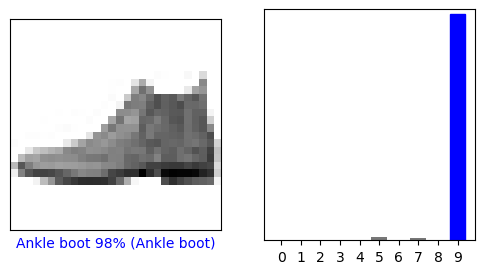

In [43]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

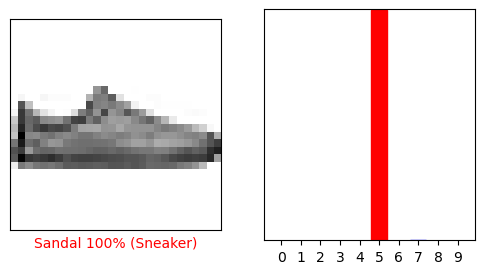

In [45]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

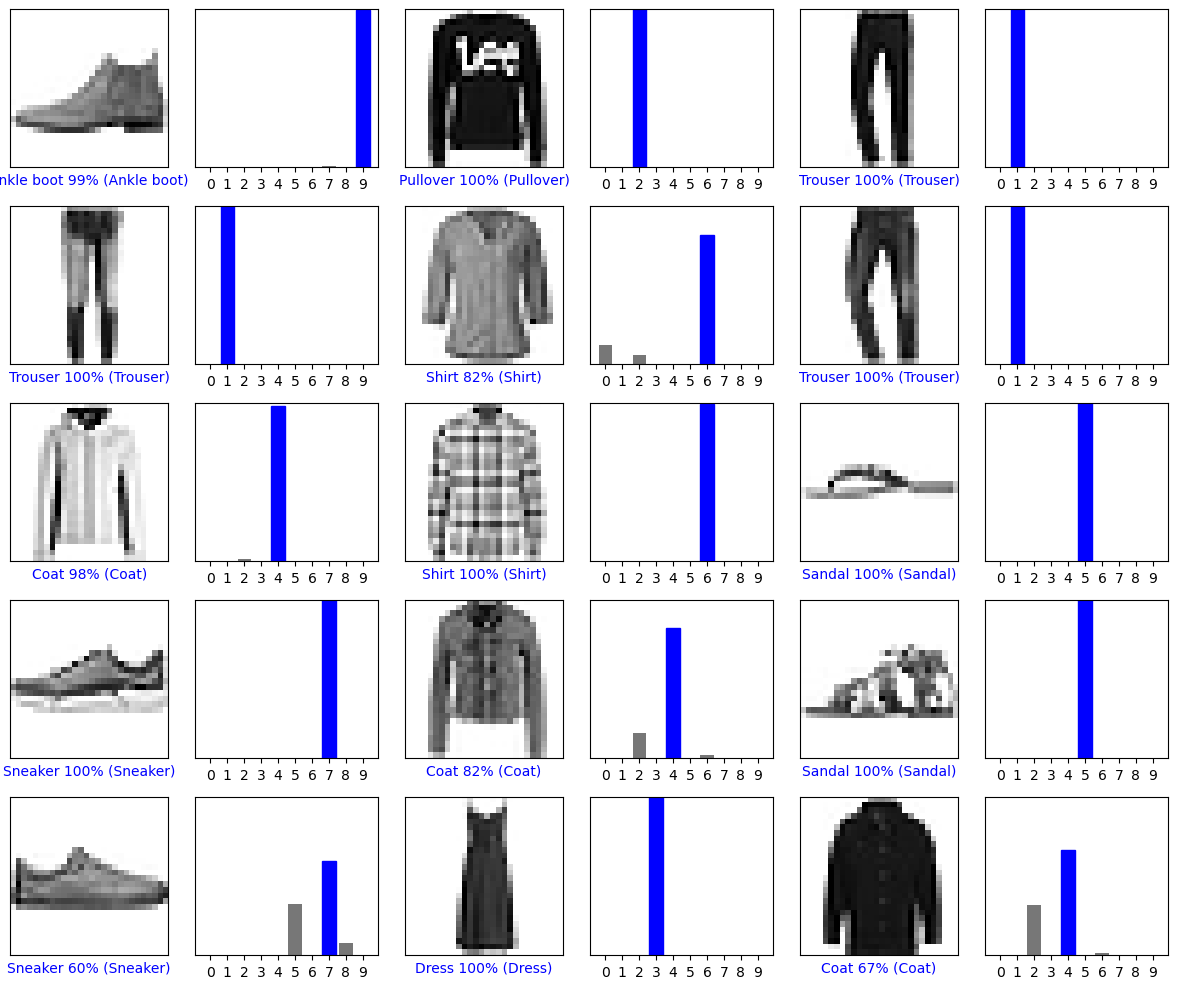

In [70]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Use the trained model

Finally, use the trained model to make a prediction about a single image.

In [72]:
# # Grab an image from the test dataset.
# img = test_images[1]

# print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [130]:
import cv2
image = cv2.imread('classification_test2.png')   
# BGR -> RGB  
#type(image.shape)
# img2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)   
small_img=cv2.resize(image, (28,28))
img=cv2.cvtColor(small_img, cv2.COLOR_BGR2GRAY,)
img=np.abs(256-img)
img
# print(final_img.shape)

array([[  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1],
       [  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1],
       [  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1],
       [  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1],
       [  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1],
       [  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1],
       [  

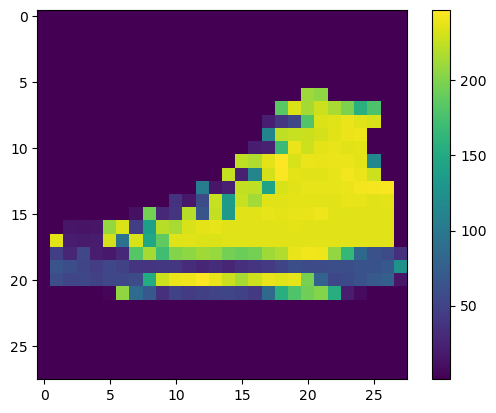

In [132]:
plt.figure()
plt.imshow(img)
plt.colorbar()
plt.grid(False)
plt.show()

In [134]:
# # Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [147]:
predictions_single = probability_model.predict(img)

predictions_single

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)

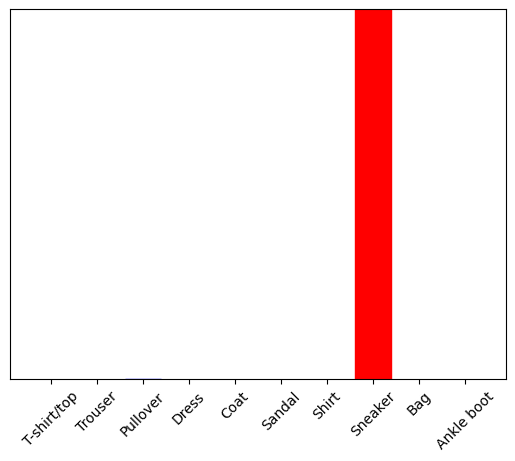

In [139]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

`tf.keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

And the model predicts a label as expected.

To learn more about building models with Keras, see the [Keras guides](https://www.tensorflow.org/guide/keras).

In [69]:
final_img = (np.expand_dims(final_img,0))
predictions_single_1 = probability_model.predict(final_img)

print(predictions_single_1)

NameError: name 'final_img' is not defined

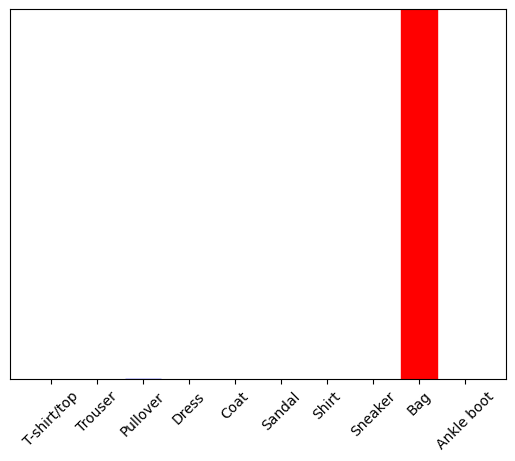

In [148]:
plot_value_array(1, predictions_single_1[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()